# Importing Libraries


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset

In [37]:
df = pd.read_csv('/content/Hypermarket_Sales Task.csv')

In [38]:
df.shape

(1000, 13)

In [39]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,wallet,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40
2,631-41-3108,A,Yangonn,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Creditcard,324.31
3,123-19-1176,A,Yangon,Member,male,Health and be,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76
4,373-73-7910,A,Yangon,Normal,male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17


In [40]:
df.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs
2,631-41-3108,A,Yangonn,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Creditcard,324.31


# Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Payment        1000 non-null   object 
 12  cogs           1000 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [42]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [43]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs'],
      dtype='object')

# Data Cleaning

In [44]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [45]:
df.duplicated().sum()

0

In [46]:
# Find rows in 'Invoice ID' that are not digits
non_numeric_invoice_ids = df[~df['Invoice ID'].str.isdigit()]['Invoice ID']
print(non_numeric_invoice_ids)

0      750-67-8428
1      226-31-3081
2      631-41-3108
3      123-19-1176
4      373-73-7910
          ...     
995    233-67-5758
996    303-96-2227
997    727-02-1313
998    347-56-2442
999    849-09-3807
Name: Invoice ID, Length: 1000, dtype: object


In [47]:
# Remove non-numeric characters from 'Invoice ID'
df['Invoice ID'] = df['Invoice ID'].str.replace(r'[^0-9]', '', regex=True)

# Convert 'Invoice ID' to integers
df['Invoice ID'] = pd.to_numeric(df['Invoice ID'])

In [48]:
df['Invoice ID'] = df['Invoice ID'].astype('int')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
# Ensure datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [50]:
df.nunique()

,0
Invoice ID,1000
Branch,3
City,4
Customer type,2
Gender,3
Product line,8
Unit price,943
Quantity,10
Tax 5%,990
Total,990


In [51]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Health and be', 'Sports and travel',
       'Food and beverages', 'Fashion accessories', 'Health '],
      dtype=object)

In [52]:
df[(df['Product line'] == 'Health and beauty') | (df['Product line'] == 'Health and be')]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs
0,750678428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,wallet,522.83
3,123191176,A,Yangon,Member,male,Health and be,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76
8,665329167,A,Yangon,Member,Female,Health and be,36.26,2,3.6260,76.1460,2019-01-10,Creditcard,72.52
14,829343910,A,Yangon,Normal,Female,Health and be,71.38,10,35.6900,749.4900,2019-03-29,Cash,713.80
16,656959349,A,Yangon,Member,Female,Health and be,68.93,7,24.1255,506.6355,2019-03-11,Creditcard,482.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148417930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,2019-01-23,Cash,699.72
986,764448999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2019-02-18,Ewallet,29.52
987,552445977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,2019-01-03,Credit card,496.00
989,430534718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,Credit card,602.96


In [53]:
#Rename the values so that all entries are consistent.
df['Payment'] = df['Payment'].replace('Creditcard', 'Credit card')
df['Payment'] = df['Payment'].replace('wallet', 'Ewallet')
df['Product line'] = df['Product line'].replace('Health and be', 'Health and beauty')
df['Product line'] = df['Product line'].replace('Health ', 'Health and beauty')
df['City'] = df['City'].replace('Yangonn', 'Yangon')

print(df['Payment'].unique())
print(df['Product line'].unique())
print(df['City'].unique())

['Ewallet' 'Cash' 'Credit card']
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
['Yangon' 'Naypyitaw' 'Mandalay']


In [54]:
df.describe().round(2).transpose()

,count,mean,min,25%,50%,75%,max,std
Invoice ID,1000.0,505320377.96,101176199.0,303509710.75,510873381.0,712798550.75,898042717.0,230309959.08
Unit price,1000.0,55.67,10.08,32.88,55.23,77.94,99.96,26.49
Quantity,1000.0,5.51,1.0,3.0,5.0,8.0,10.0,2.92
Tax 5%,1000.0,15.38,0.51,5.92,12.09,22.45,49.65,11.71
Total,1000.0,322.97,10.68,124.42,253.85,471.35,1042.65,245.89
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00,NaN
cogs,1000.0,307.59,10.17,118.5,241.76,448.9,993.0,234.18


# Correlation Analysis

In [55]:
# Create a new DataFrame for encoded data
encoded_df = pd.DataFrame()

# Iterate through all columns in the original DataFrame
for col in df.columns:
    # Check if the column is numeric
    if df[col].dtype in ['int64', 'float64']:
        # Add numeric columns directly to encoded_df
        encoded_df[col] = df[col]
    else:
        # Apply Label Encoding for non-numeric columns
        le = LabelEncoder()
        encoded_df[col + '_encoded'] = le.fit_transform(df[col])

# df: The original DataFrame
# encoded_df: The DataFrame with all columns encoded

In [56]:
encoded_df.dtypes

,0
Invoice ID,int64
Branch_encoded,int64
City_encoded,int64
Customer type_encoded,int64
Gender_encoded,int64
Product line_encoded,int64
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [57]:
encoded_df.corr()

,Invoice ID,Branch_encoded,City_encoded,Customer type_encoded,Gender_encoded,Product line_encoded,Unit price,Quantity,Tax 5%,Total,Date_encoded,Payment_encoded,cogs
Invoice ID,1.000000,-0.041172,0.030795,0.070988,0.008559,0.022997,-0.009705,0.025474,0.027306,0.027306,-0.022854,0.021075,0.027306
Branch_encoded,-0.041172,1.000000,-0.507401,-0.019608,-0.043658,-0.057826,0.028202,0.015964,0.041047,0.041047,-0.038448,-0.050104,0.041047
City_encoded,0.030795,-0.507401,1.000000,0.004899,0.024755,0.022972,-0.013763,-0.002121,-0.012812,-0.012812,0.010881,0.019094,-0.012812
Customer type_encoded,0.070988,-0.019608,0.004899,1.000000,0.054321,-0.039863,-0.020238,-0.016763,-0.019670,-0.019670,0.016329,0.018073,-0.019670
Gender_encoded,0.008559,-0.043658,0.024755,0.054321,1.000000,0.021824,0.033206,-0.030777,-0.000387,-0.000387,0.026563,0.053564,-0.000387
Product line_encoded,0.022997,-0.057826,0.022972,-0.039863,0.021824,1.000000,0.012094,0.021016,0.031420,0.031420,-0.043070,0.032374,0.031420
Unit price,-0.009705,0.028202,-0.013763,-0.020238,0.033206,0.012094,1.000000,0.010778,0.633962,0.633962,-0.006473,-0.015941,0.633962
Quantity,0.025474,0.015964,-0.002121,-0.016763,-0.030777,0.021016,0.010778,1.000000,0.705510,0.705510,-0.029563,-0.003921,0.705510
Tax 5%,0.027306,0.041047,-0.012812,-0.019670,-0.000387,0.031420,0.633962,0.705510,1.000000,1.000000,-0.022899,-0.012434,1.000000
Total,0.027306,0.041047,-0.012812,-0.019670,-0.000387,0.031420,0.633962,0.705510,1.000000,1.000000,-0.022899,-0.012434,1.000000


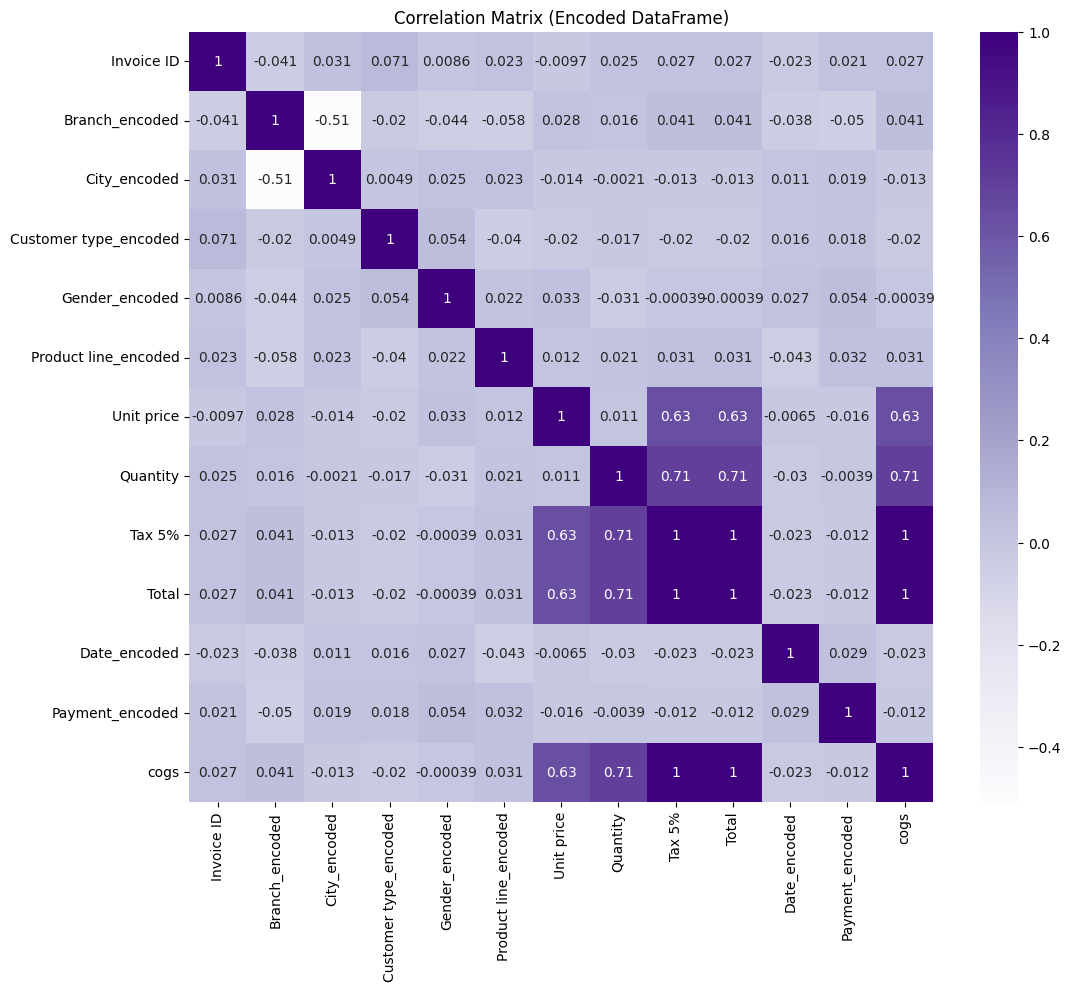

In [58]:
corr_matrix = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="Purples")
plt.title('Correlation Matrix (Encoded DataFrame)')
plt.show()

# Ask a Questions about the Data

1. Total and Average Sales by Department

Identifying top-performing
departments and evaluating their average sales performance.

In [59]:
department_total_sales = df.groupby('Product line')['Total'].sum().round(2)
print(department_total_sales)

Product line
Electronic accessories    51054.19
Fashion accessories       51661.88
Food and beverages        53848.78
Health and beauty         63865.37
Home and lifestyle        51500.92
Sports and travel         51035.61
Name: Total, dtype: float64


In [60]:
department_average_sales = df.groupby('Product line')['Total'].mean().round(2)
print(department_average_sales)

Product line
Electronic accessories    317.11
Fashion accessories       315.01
Food and beverages        326.36
Health and beauty         305.58
Home and lifestyle        341.07
Sports and travel         340.24
Name: Total, dtype: float64


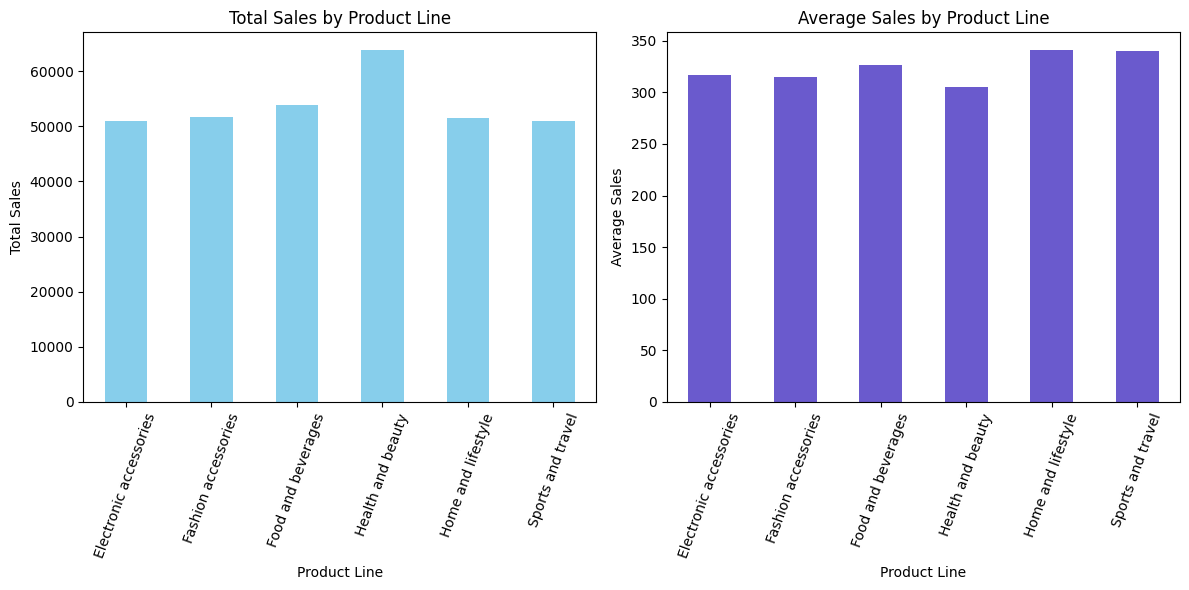

In [61]:
# Plot total sales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
department_total_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)  # Rotate x-axis labels

# Plot average sales
plt.subplot(1, 2, 2)
department_average_sales.plot(kind='bar', color='slateblue')
plt.title('Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.xticks(rotation=70)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

2. Seasonal Trends

Analyzing sales data across different months to determine
peak sales periods.

In [62]:
df_copy = df.copy()
df_copy['Month'] = df_copy['Date'].dt.month
monthly_sales = df_copy.groupby('Month')['Total'].sum().round(2)
print(monthly_sales)

Month
1    116291.87
2     97219.37
3    109455.51
Name: Total, dtype: float64


In [63]:
# Convert Date column to datetime
df_copy['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

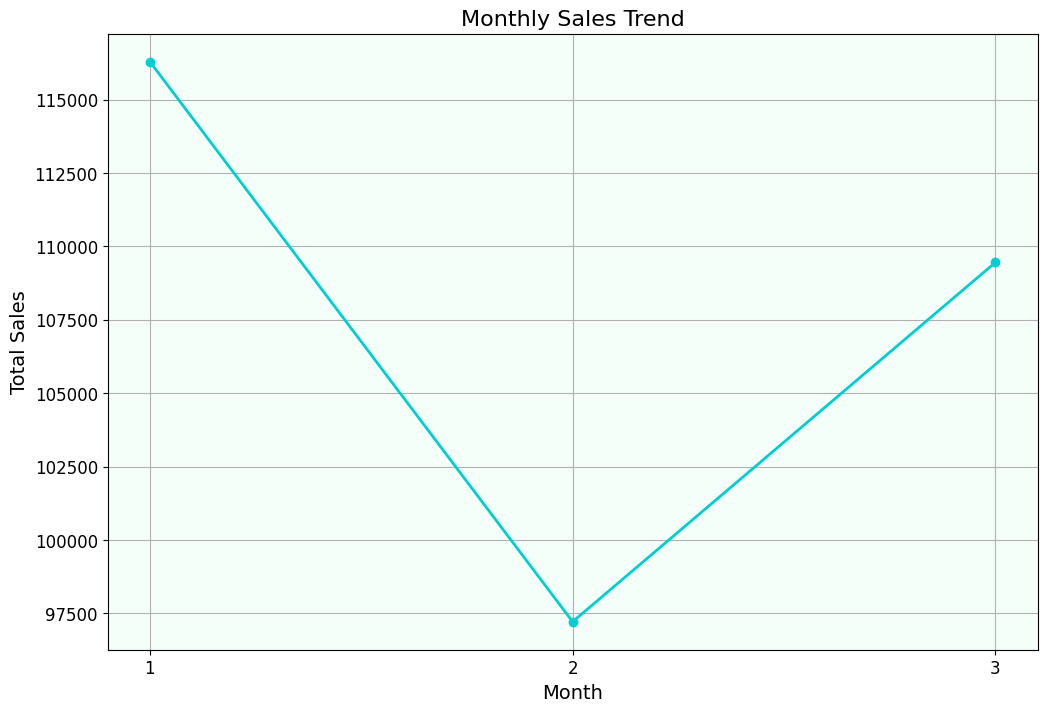

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color="darkTurquoise", linewidth=2)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.title('Monthly Sales Trend', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_facecolor('mintcream')
plt.show()

3. Sales by City and Payment Method

Understanding the relationship between
sales performance, city locations, and preferred payment methods.

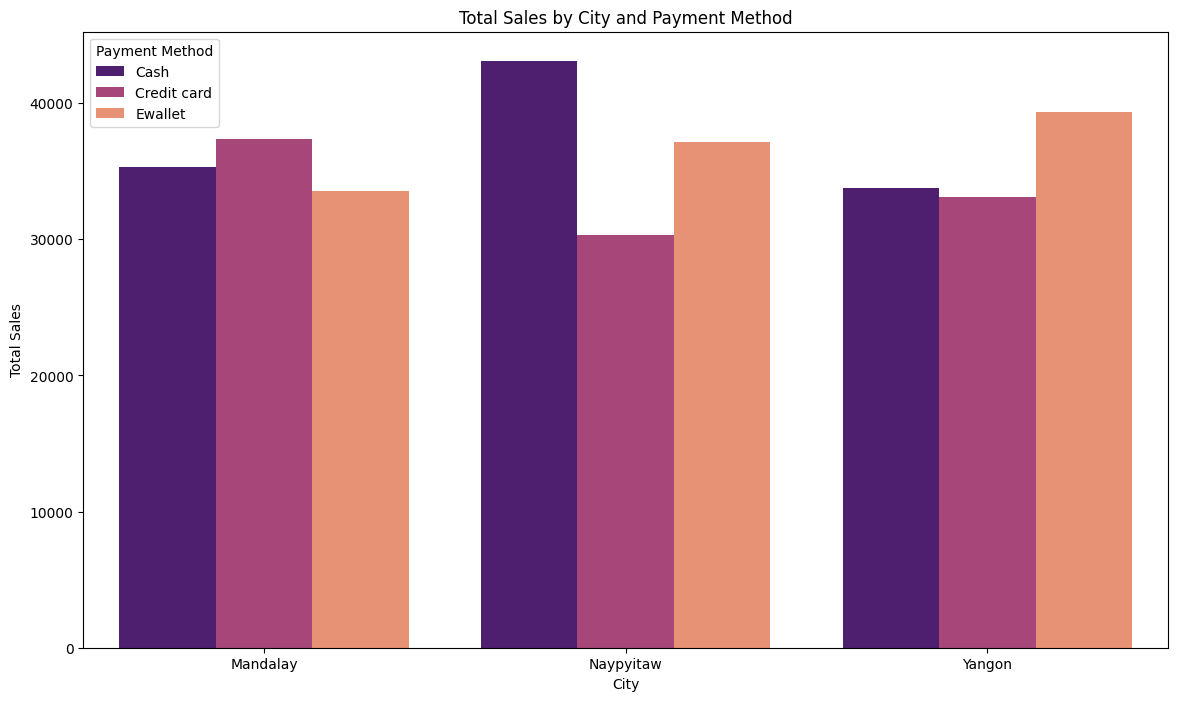

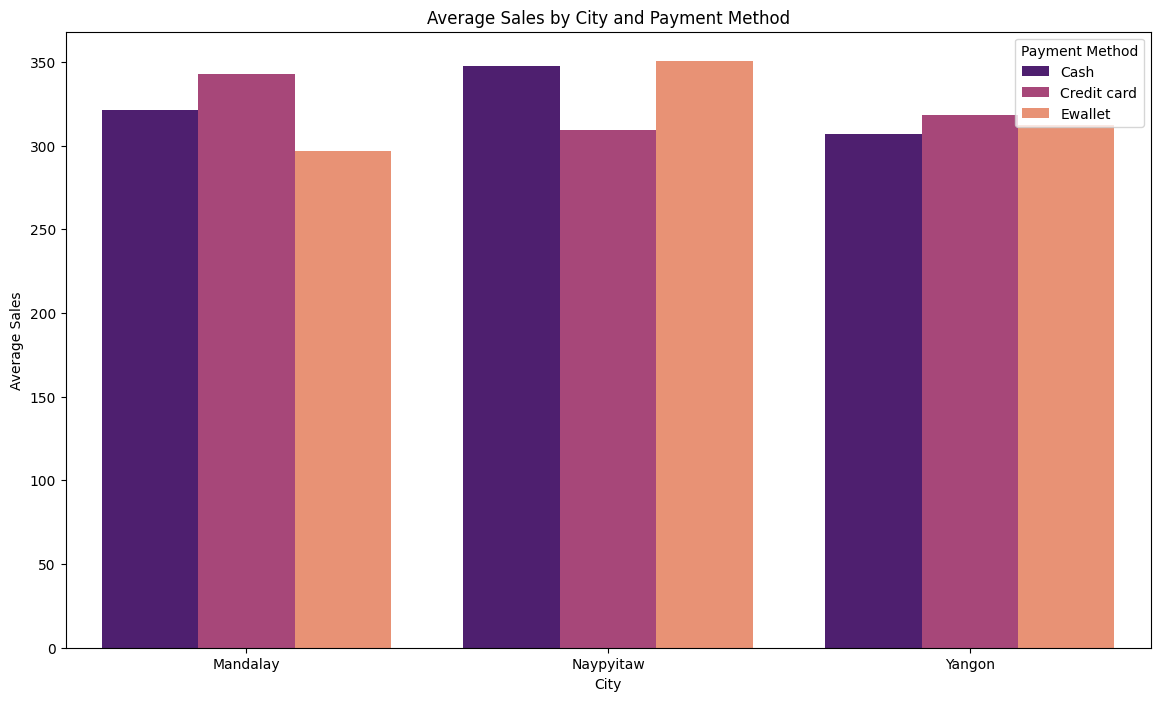

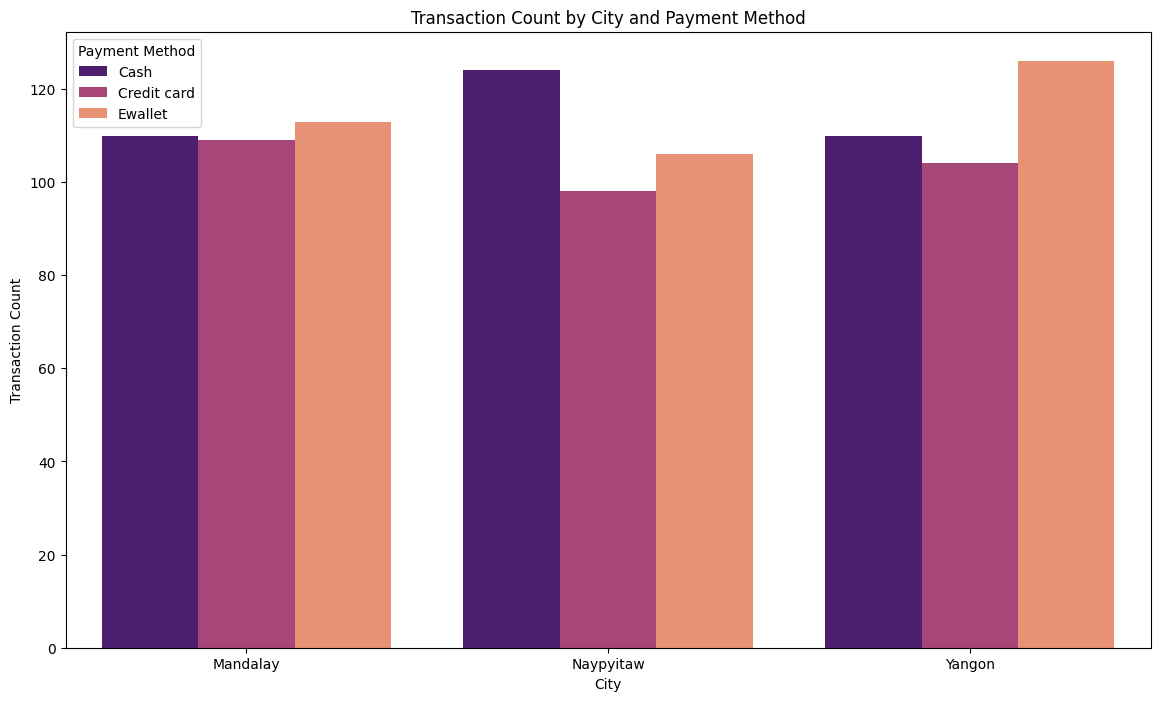

In [65]:
# Group data by City and Payment method
city_payment_sales = df.groupby(['City', 'Payment'])['Total'].agg(['sum', 'mean', 'count']).reset_index()

# Rename columns for clarity
city_payment_sales.columns = ['City', 'Payment', 'Total Sales', 'Average Sales', 'Transaction Count']

# Plot total sales by city and payment method
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Total Sales', hue='Payment', data=city_payment_sales, palette='magma')
plt.title('Total Sales by City and Payment Method')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.legend(title='Payment Method')
plt.show()

# Plot average sales by city and payment method
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Average Sales', hue='Payment', data=city_payment_sales, palette='magma')
plt.title('Average Sales by City and Payment Method')
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.legend(title='Payment Method')
plt.show()

# Plot transaction count by city and payment method
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Transaction Count', hue='Payment', data=city_payment_sales, palette='magma')
plt.title('Transaction Count by City and Payment Method')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.legend(title='Payment Method')
plt.show()

4. Customer Types

Examining sales by customer type to tailor marketing efforts.

In [66]:
# Group by Customer Type and calculate the sum of 'Total' for each group
Customer_type = df.groupby('Customer type')['Total'].sum().reset_index().round(2)
print(Customer_type)

  Customer type      Total
0        Member  164223.44
1        Normal  158743.30


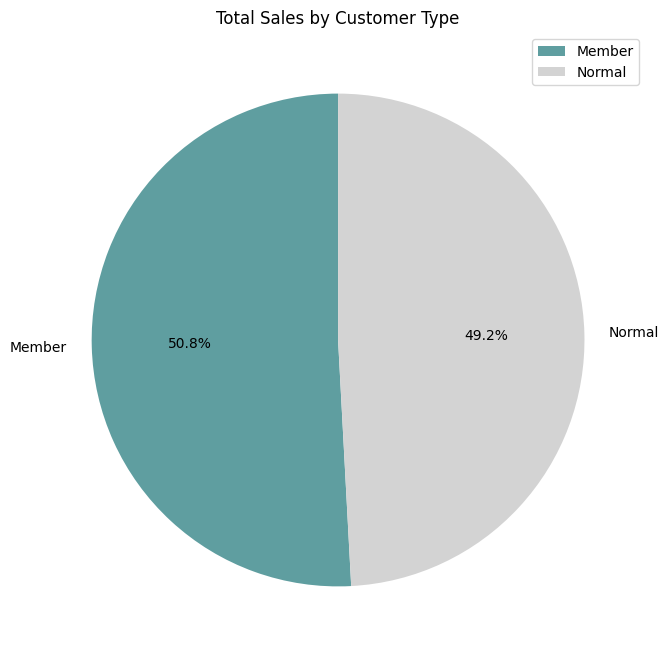

In [67]:
plt.figure(figsize=(10, 8))
plt.pie(Customer_type['Total'], labels=Customer_type['Customer type'], autopct='%1.1f%%',colors=['cadetblue', 'lightgrey'], startangle=90)
plt.title('Total Sales by Customer Type')
plt.legend(Customer_type['Customer type'], loc="best")
plt.show()

In [68]:
df.to_csv("HyperMarket_Sales.csv", index=False)